In [39]:
#%matplotlib qt5 #inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
#import sys

from LoadFiles import get_dataframe
from LoadFiles import get_chart

def get_chart2(data_frame, combo_box):
    ip = widgets.FloatProgress(min=0,max=100)
    ip.s
    ip.description = 'Creating Chart'
    display(ip)

    index = 0
    list_order_status_tmp = [] #list_order_status
    list_groupby = ['MonthYear','Year','Status']

    df_orders_month_status = data_frame
    list_cb = combo_box
    
    df_orders_month_status = df_orders_sum.groupby(list_groupby, as_index=False).count()
    list_groupby.append('Order Date')
    df_orders_month_status = df_orders_month_status[list_groupby]
    df_orders_month_status = df_orders_month_status.rename(columns={'Order Date' : 'Nbr of orders'})

    for cb in list_cb:
        if cb.value != False:
            #print(cb.description)
            list_order_status_tmp.append(cb.description) 
        index += 1   

    ip.value = 25
    #print(list_order_status_tmp)
    list_order_status = list_order_status_tmp
    #print(list_order_status)

    test = "item_tmp2['Year'] == '2018'"

    list_os = []
    for status in list_order_status:
        #print(status)
        item_tmp = df_orders_month_status.loc[df_orders_month_status['Status'] == status]
        #item_tmp = item_tmp2.loc[item_tmp2['Year'] == '2018']    
        list_os.append(item_tmp)    
    #print(list_os)    

    plt.close()
    plt.figure(figsize=(25,10))
    plt.rcParams.update({'font.size': 14})      

    flt = list_groupby[0]

    progress = len(list_os[1].count())
    progress_step = 100 / progress
    cont = 0

    ip.value = 50
    #plt.plot(df_orders_month_status_all['MonthYear'], df_orders_month_status_all['Nbr of orders'] , color='r')
    #plt.legend('All')#list_os[cont]['Status'])

    for item in list_os:
        plt.plot(list_os[cont][flt], list_os[cont]['Nbr of orders'], label =list_os[cont]['Status'] )#, color='r')
        #plt.legend(list_order_status)#list_os[cont]['Status'])    
        #if cont == 0:    
        #print(list_os[cont][flt])
        ip.value += progress_step
        cont +=1   

    plt.plot(df_orders_month_status_all['MonthYear'], df_orders_month_status_all['Nbr of orders'] , color='k')
    list_order_status.append('Total Orders')
    plt.legend(list_order_status)#list_os[cont]['Status'])

    if (cb_save.value == True):    
        plt.savefig('chart.jpg')

    plt.show()    

    #item_tmp.head()    


    list_order_status = df_orders_sum['Status'].unique()    

### Getting main Dataframe

In [2]:
data_frame = pd.DataFrame()
try:
    data_frame = get_dataframe(False)    
except:
    print('File not found')

if data_frame.empty:
    print('Dataframe empty, please verify')
    #sys.exit()
else:        
    data_frame.head()

Loading from file <output/main_dataframe.csv>...
Dataframe generated


In [3]:
data_frame.count()

Order Date       232909
Cust No          232874
Postcode         232909
Agent            232909
Order ref        232909
Order Source     232909
Disc Code        104918
Status           232909
Payment          232912
Item             232906
Description      232909
Qty              232909
Value net        232912
P&P net          232909
Invoice Fee      232909
Total net        232909
Item Type        232909
Ship Date        192952
State            232909
Delivery Date    192952
Carrier          216301
Tracking No      210774
dtype: int64

### Getting Orders Dataframe

In [4]:
df_orders = data_frame[['Order Date', 'Agent', 'Order ref', 'Order Source', 'Disc Code', 'Status', 'Value net', 'State']]
df_orders_sum = pd.DataFrame()
df_orders_sum = df_orders.groupby(['Order Date', 'Agent', 'Order ref', 'Order Source', 'Disc Code', 'Status', 'State'], as_index=False)[['Value net']].sum()
#del df_orders
df_orders_sum.dropna()
day   = [ x[8:10] for x in df_orders_sum['Order Date'] ]
month = [ x[5:7] for x in df_orders_sum['Order Date'] ]
year  = [ x[0:4] for x in df_orders_sum['Order Date'] ]
month_year = [ x[0:7] for x in df_orders_sum['Order Date'] ]
df_orders_sum['Day'] = day
df_orders_sum['Month'] = month
df_orders_sum['Year'] = year
df_orders_sum['MonthYear'] = month_year

#df_orders_sum.to_csv("orders.csv", encoding='utf-8', index=False)

df_orders_sum.head()

,Order Date,Agent,Order ref,Order Source,Disc Code,Status,State,Value net,Day,Month,Year,MonthYear
0,2017-01-01,ASEGOVIA,MX7072762,Drtv,ofe010,Shipped,MEXICO,2694.6,01,01,2017,2017-01
1,2017-01-01,ASEGOVIA,MX7072924,Drtv,ofe010,Shipped,JALISCO,2699.1,01,01,2017,2017-01
2,2017-01-01,ASEGOVIA,MX7072946,Drtv,ofe010,Shipped,CHIAPAS,2699.1,01,01,2017,2017-01
3,2017-01-01,CGUTIERREZ,MX7072886,Drtv,ofe010,Shipped,TAMAULIPAS,3234.6,01,01,2017,2017-01
4,2017-01-01,CGUTIERREZ,MX7072932,Drtv,out100,Shipped,NAYARIT,2894.0,01,01,2017,2017-01


In [5]:
df_orders_sum.Status.unique()

array(['Shipped', 'Pending Return', 'Returned', 'Cancelled',
       'Reship Cancelled', 'Sent to Batch', 'Imported', 'Payment pending',
       'Ready to Reship', 'Fraud Payment', 'Pending Partial Return',
       'Fraud Customer', 'Review Order Validation', 'Review No Stock',
       'Review Payment Failed', 'Review System Error'], dtype=object)

In [6]:
df_orders_sum['Status'].value_counts()

Shipped                    38312
Returned                   12053
Cancelled                   2830
Reship Cancelled             821
Payment pending              445
Sent to Batch                 69
Fraud Payment                 20
Review No Stock               17
Pending Return                17
Ready to Reship               17
Fraud Customer                 8
Imported                       2
Review Payment Failed          2
Review Order Validation        2
Pending Partial Return         1
Review System Error            1
Name: Status, dtype: int64

FloatProgress(value=0.0)

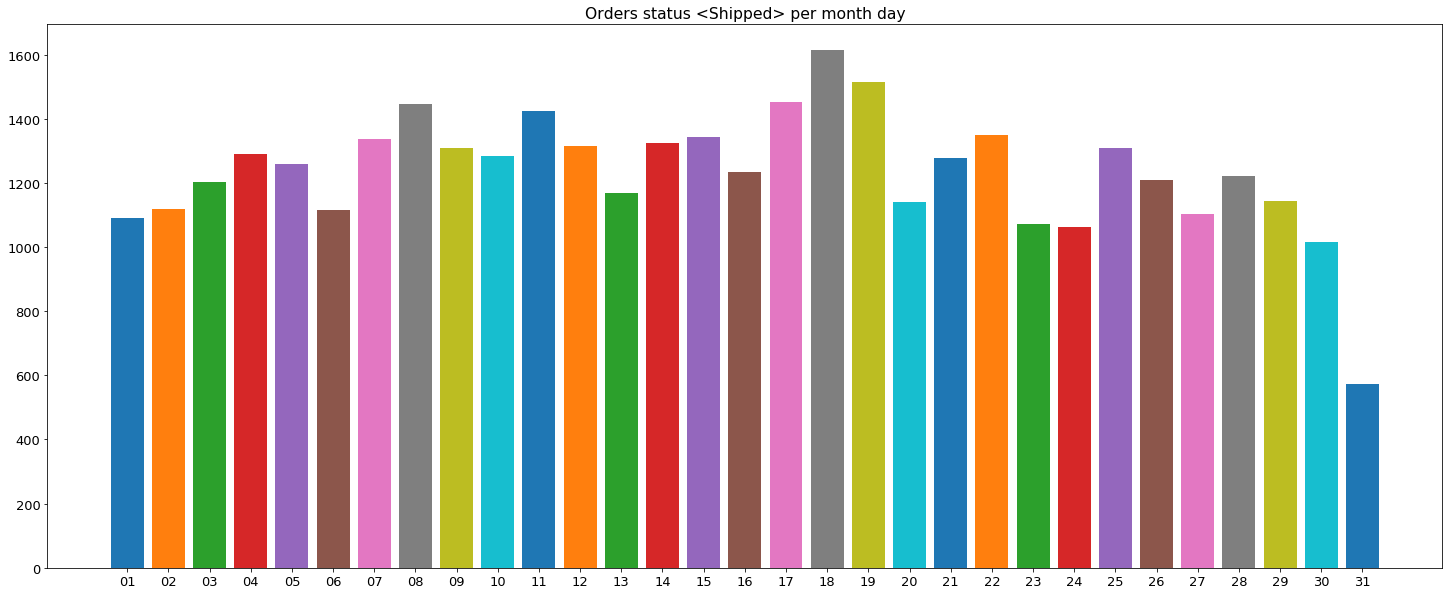

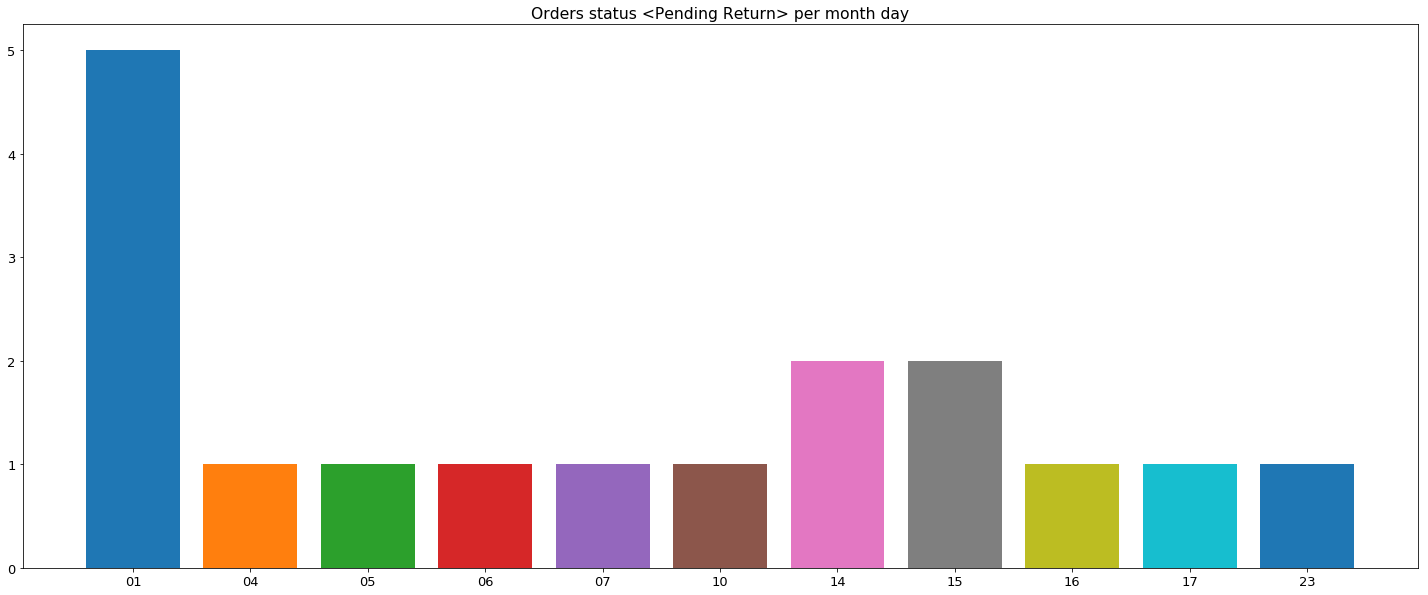

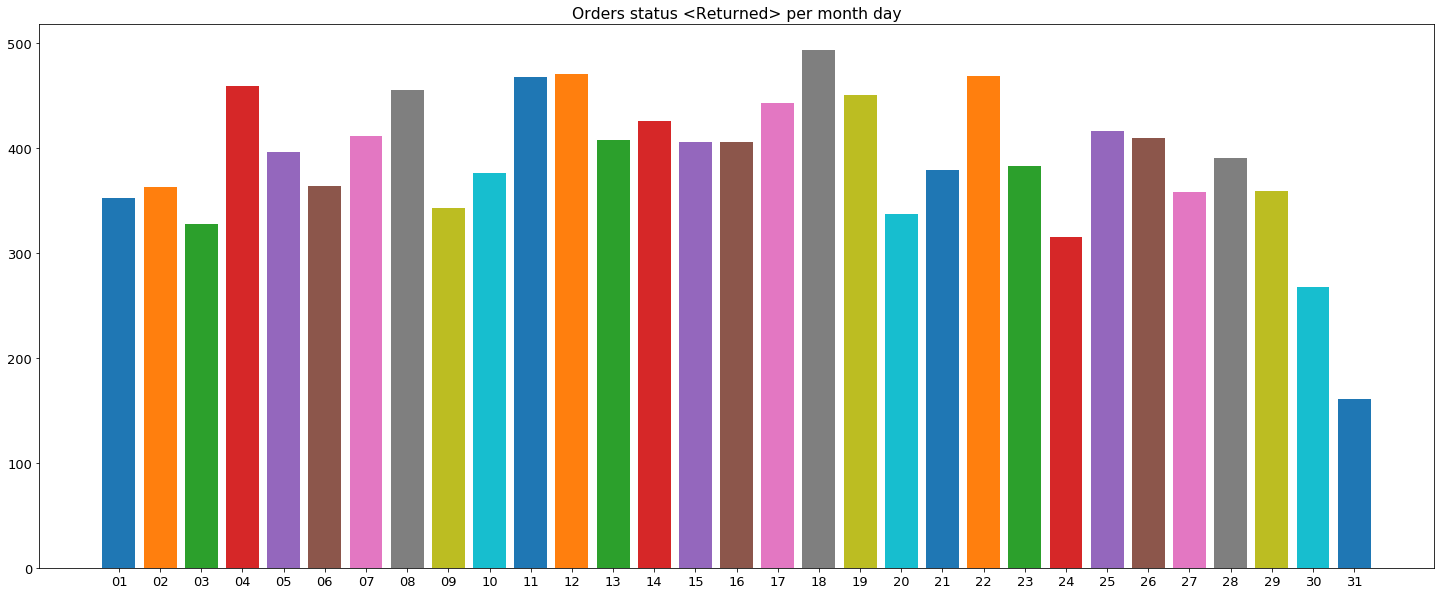

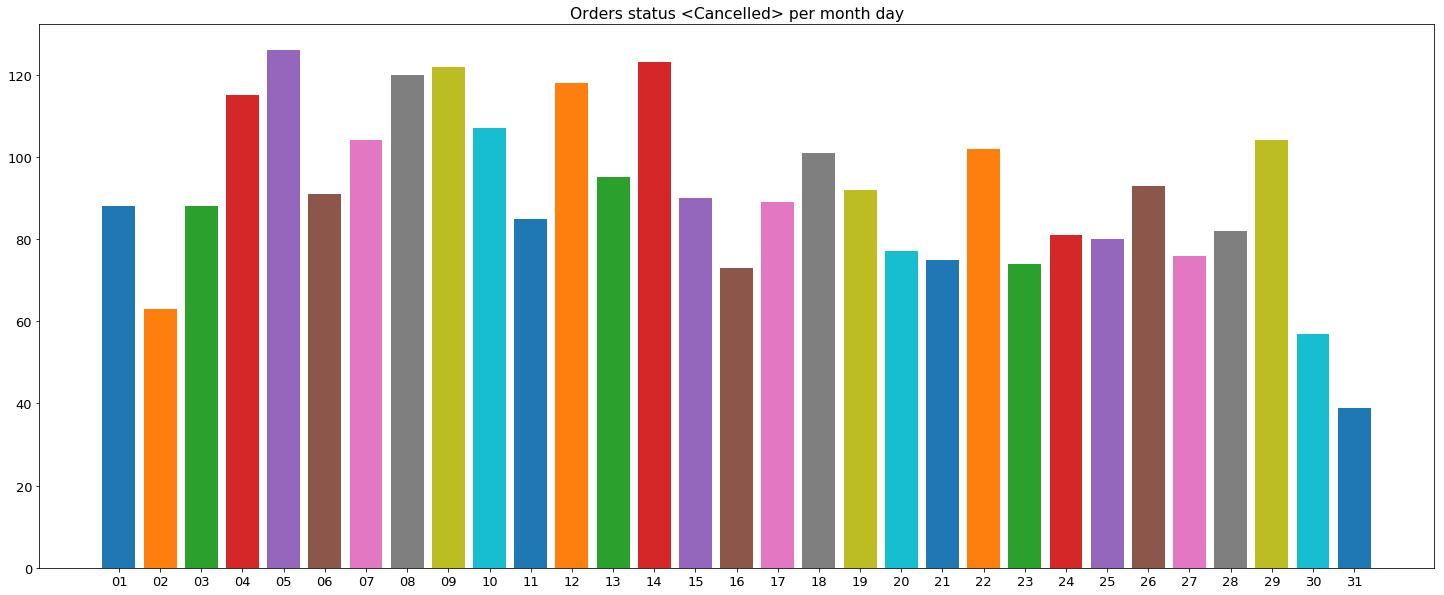

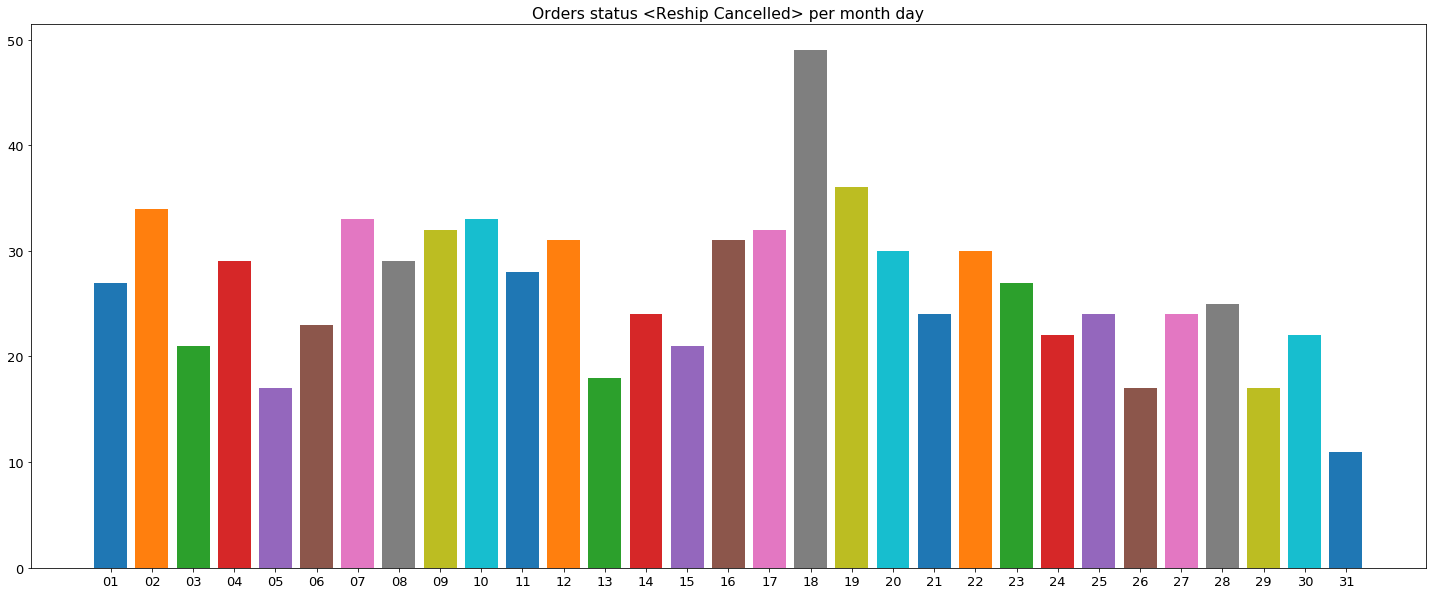

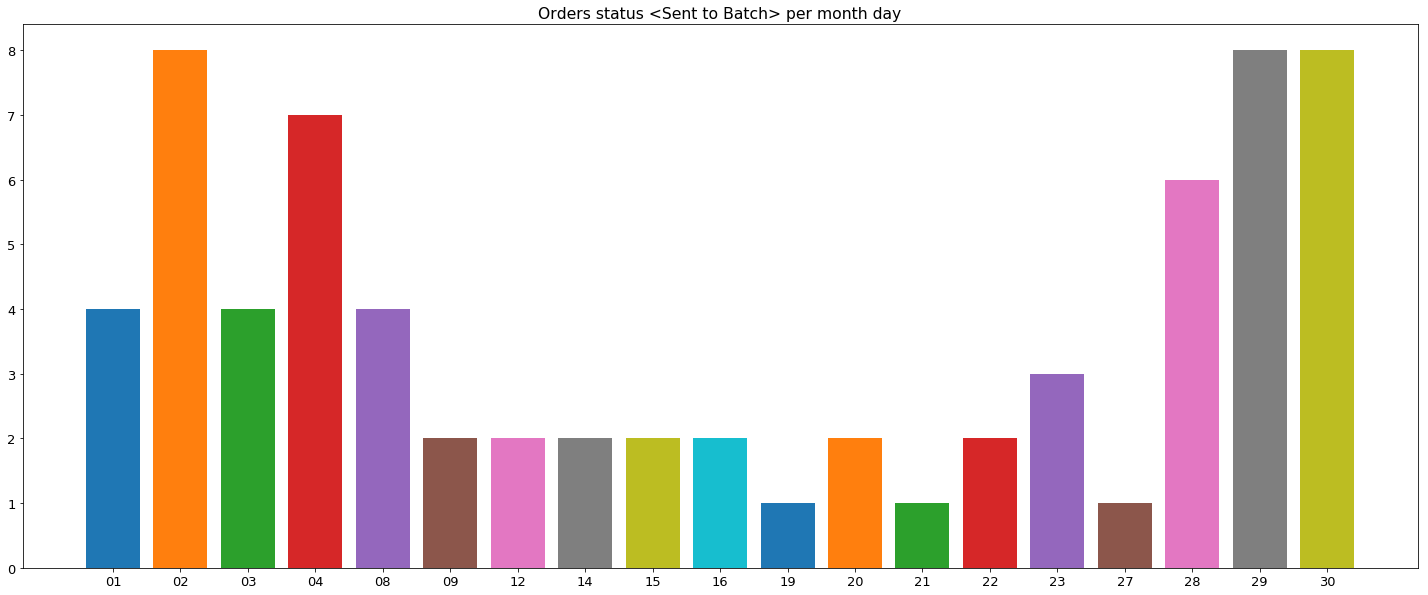

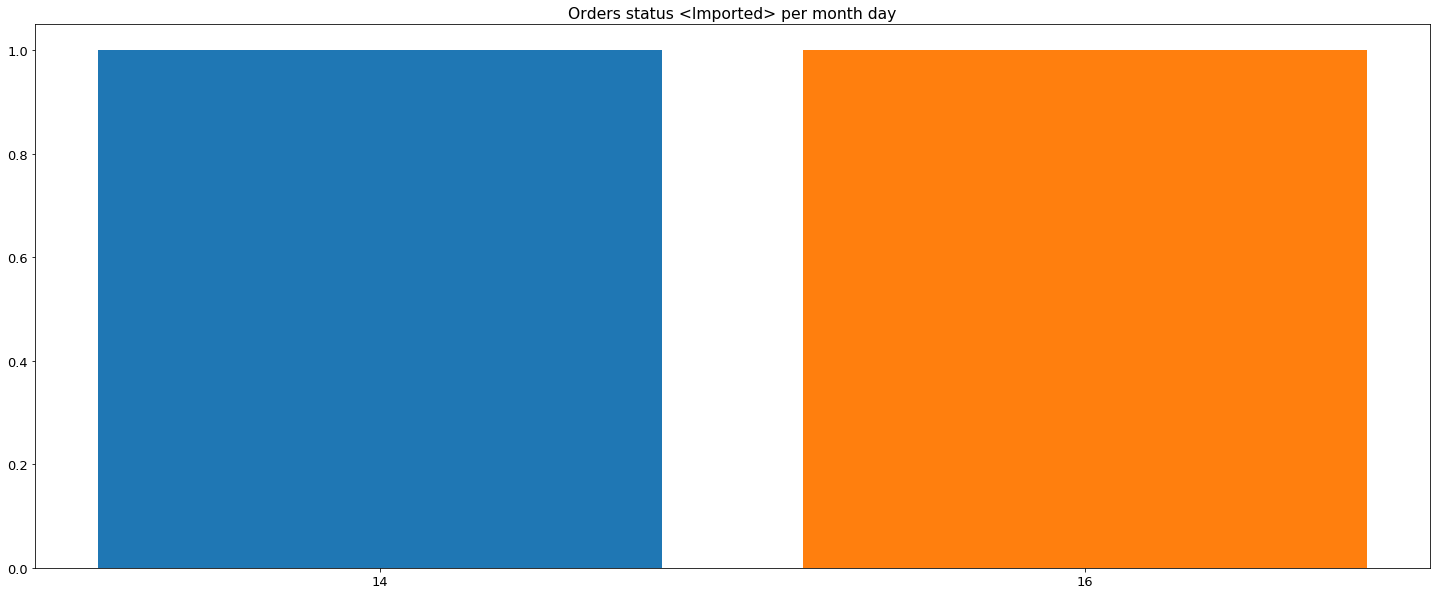

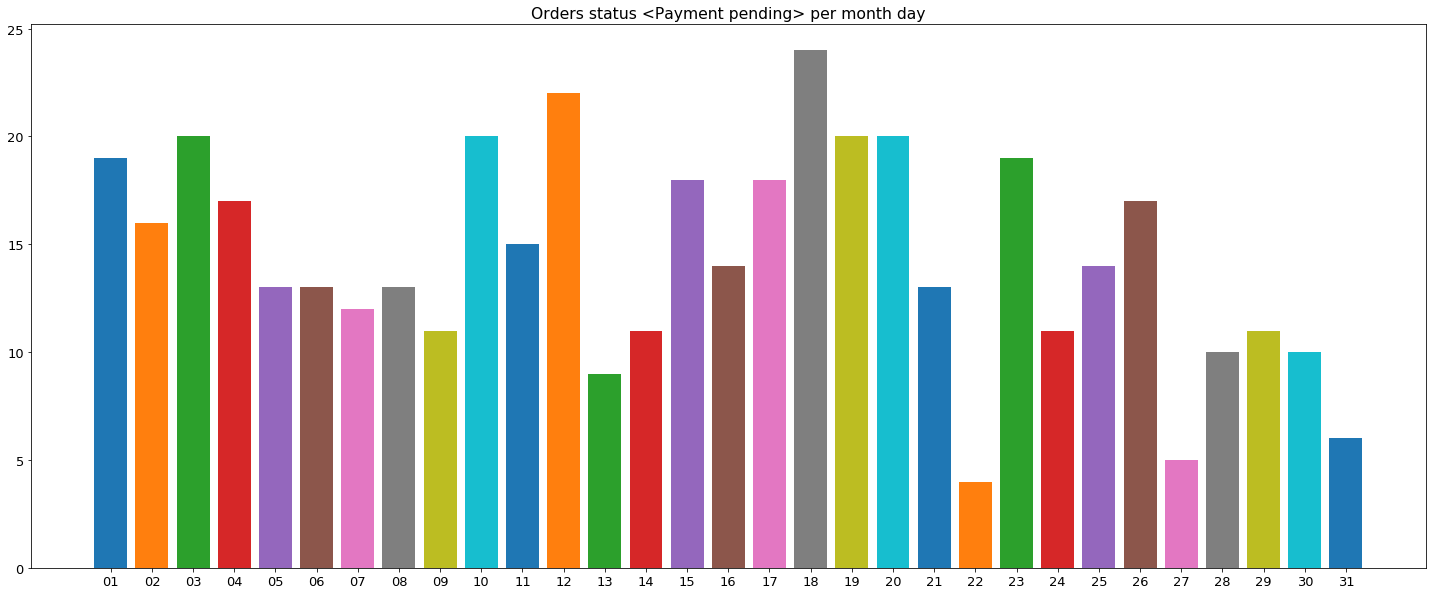

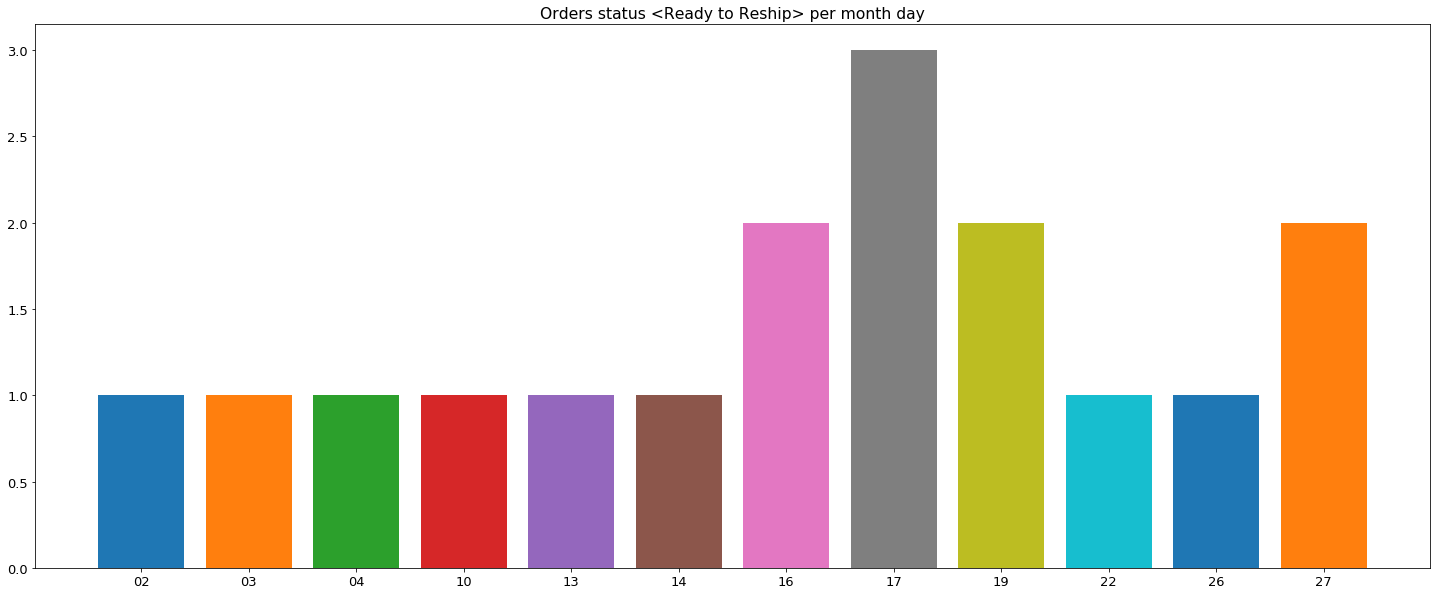

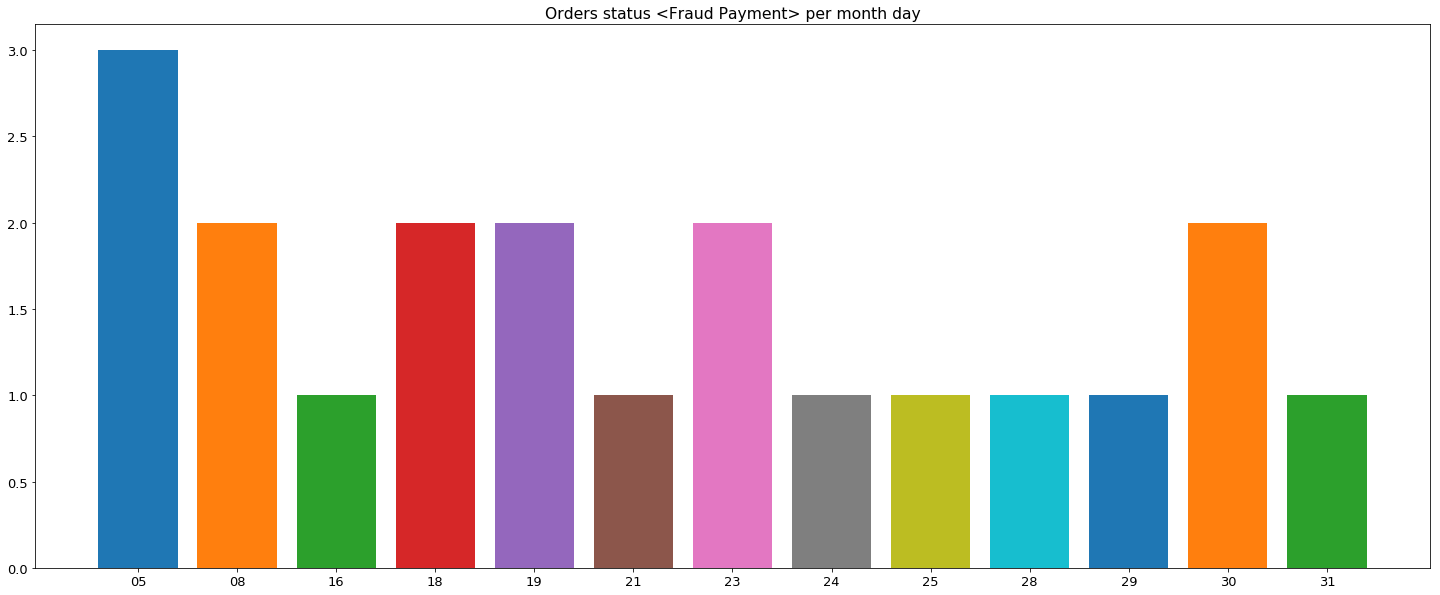

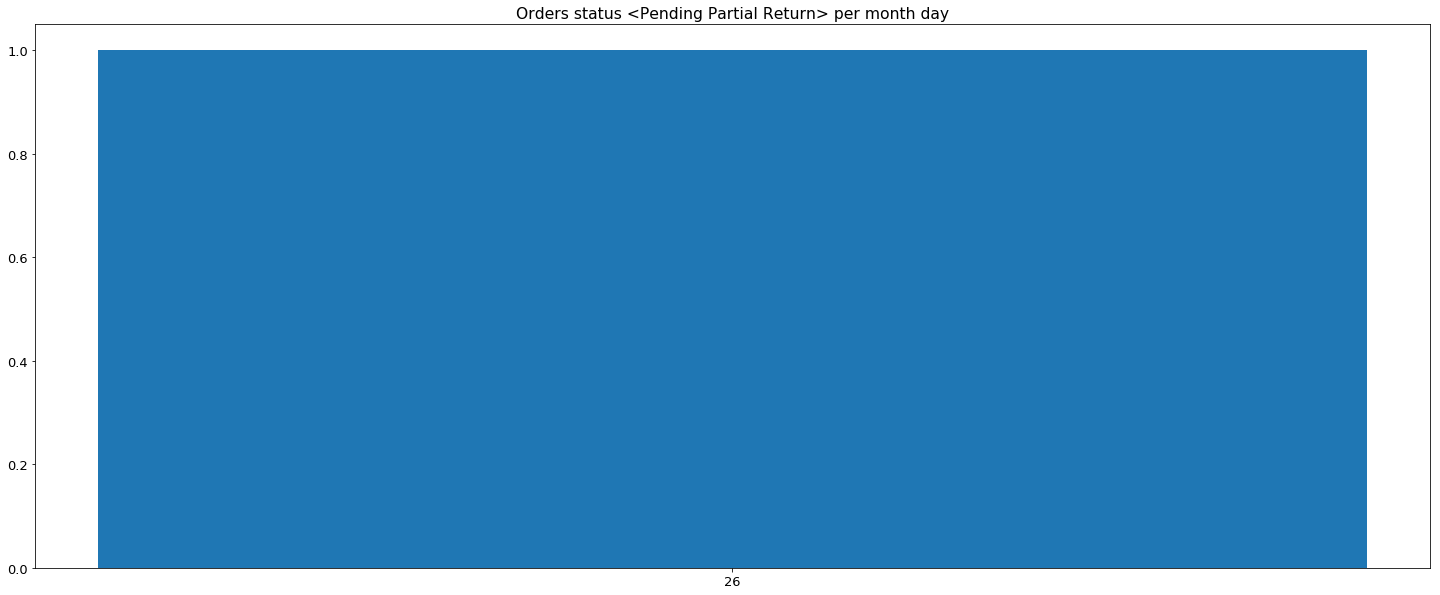

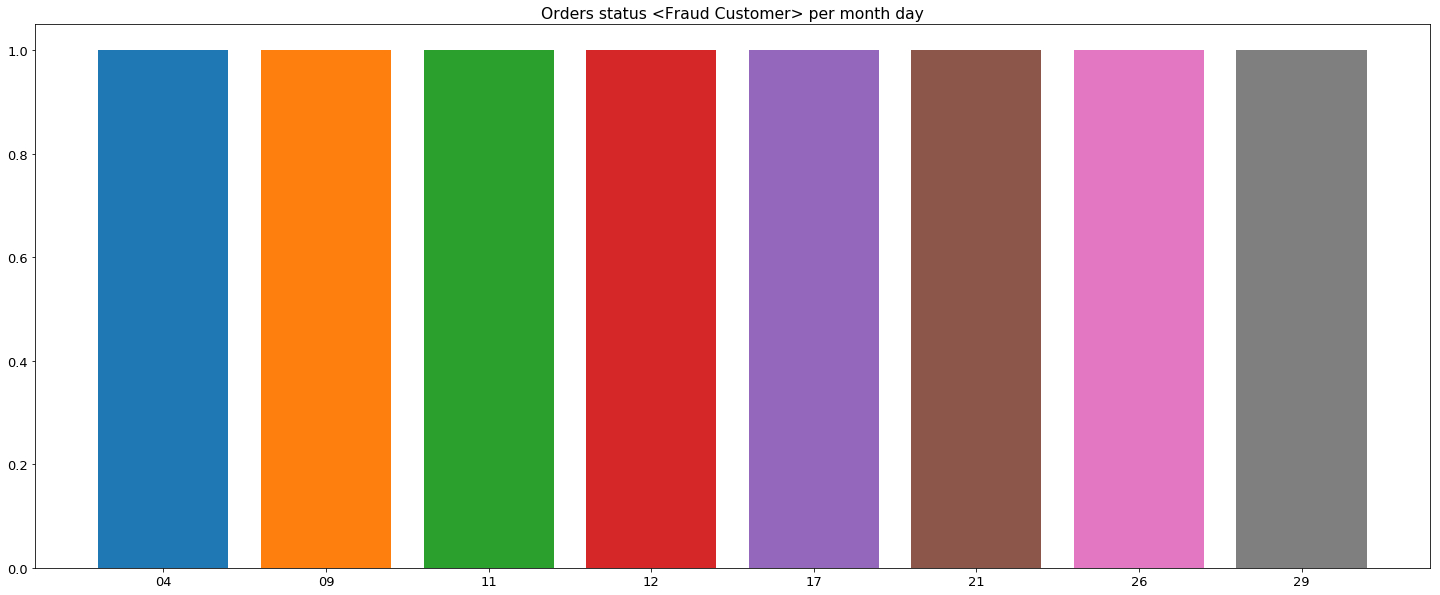

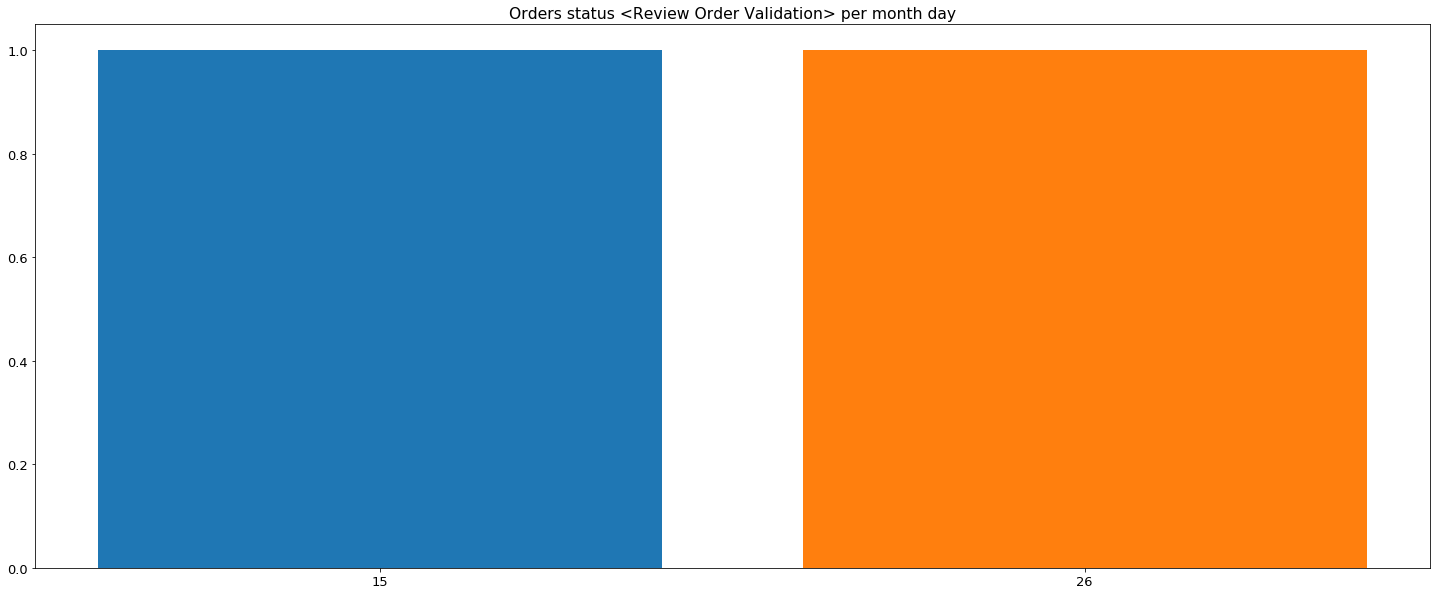

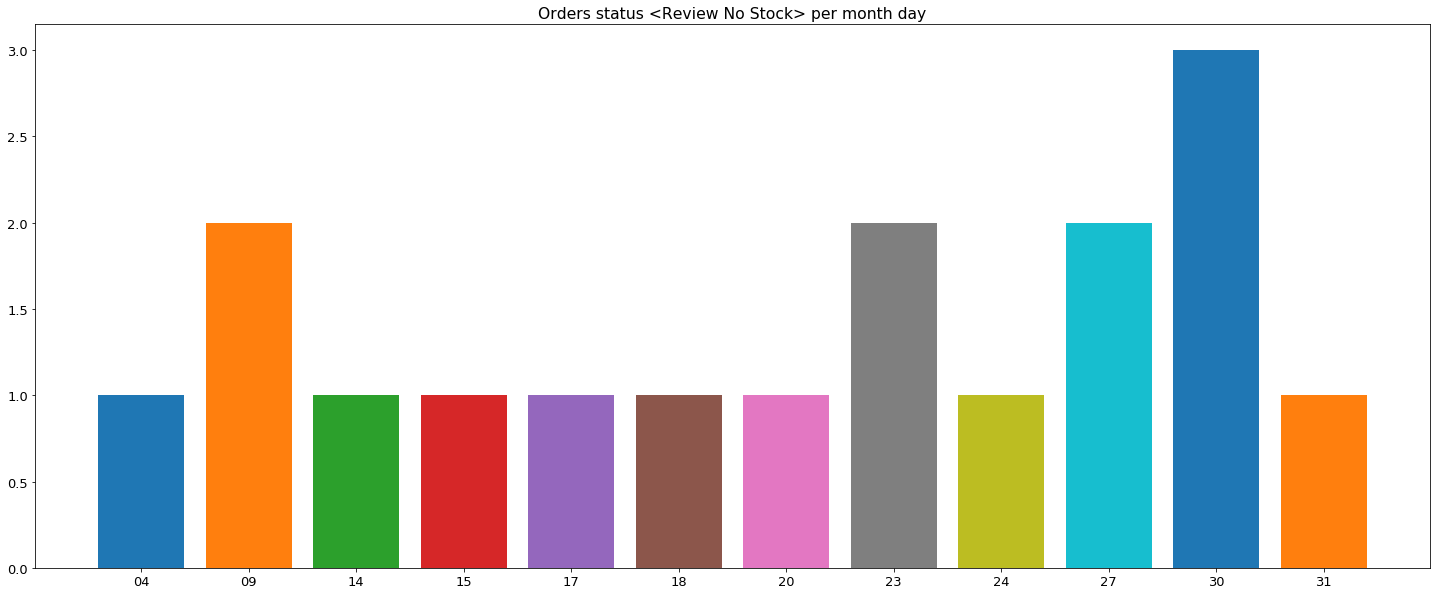

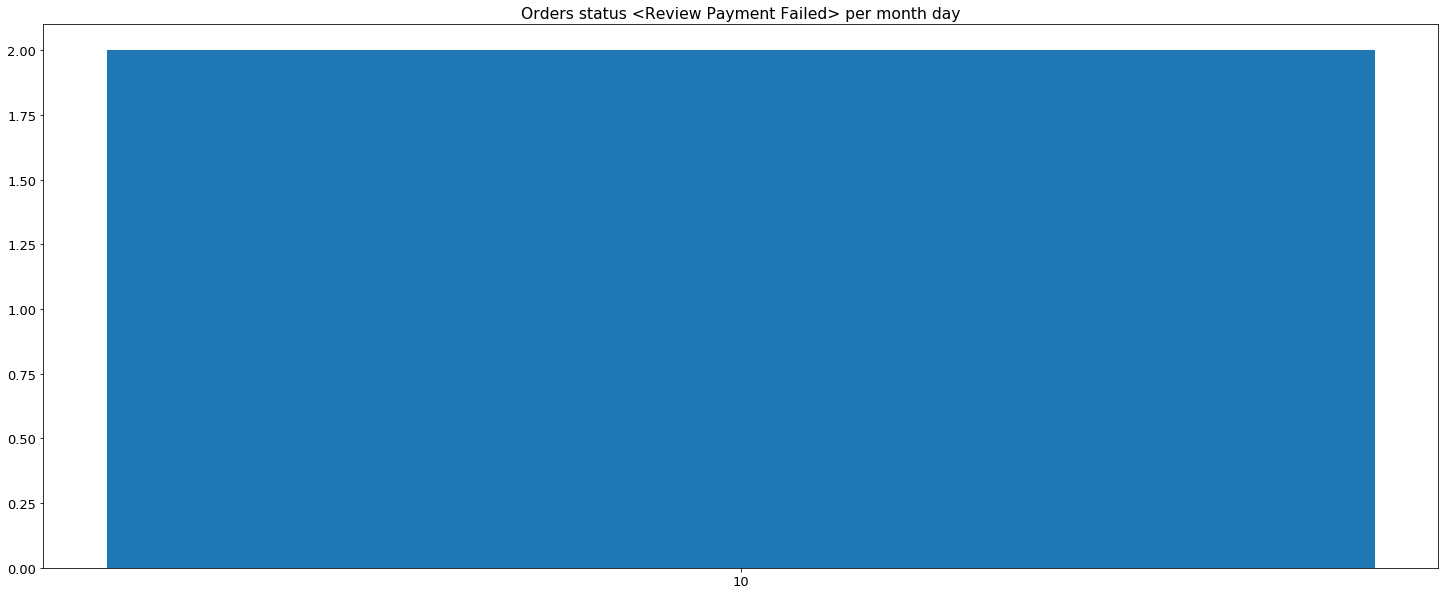

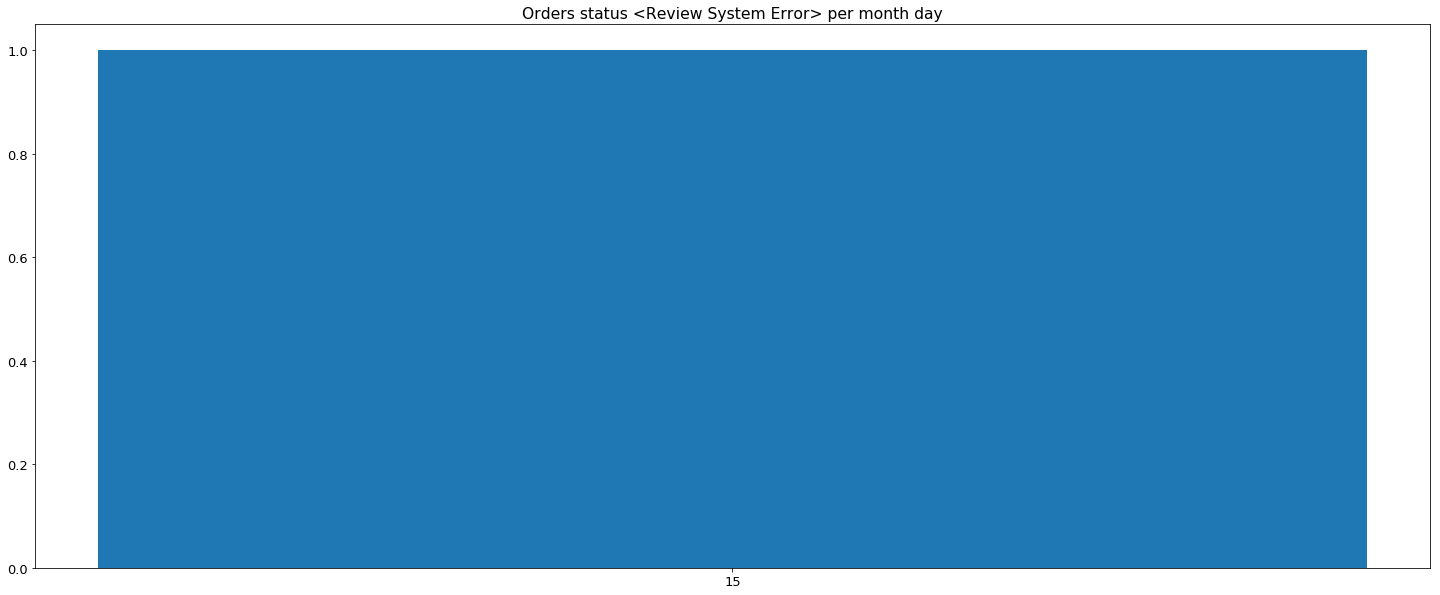

In [7]:
list_status = df_orders_sum.Status.unique()
#plt.title('Shipped orders per month day')
plt.rcParams.update({'font.size': 13})

progress = len(list_status)
progress_step = 100 / progress
#current_progress = 0

ip = widgets.FloatProgress(min=0,max=100)
display(ip)

for status in list_status:
    #df.loc[df['column_name'] == some_value]
    df_orders_day = pd.DataFrame()
    df_orders_day = df_orders_sum.loc[df_orders_sum['Status'] == status]
    #df_orders_day = pd.DataFrame()
    df_orders_day = df_orders_day.groupby(['Day'], as_index=False)[['Status']].count()

    list_order_status = df_orders_day['Day'].unique()
    list_os = []

    for day in list_order_status:
        #print(day)
        item_tmp = df_orders_day.loc[df_orders_day['Day'] == day]
        list_os.append(item_tmp)

    #print(list_os[30])
    plt.figure(figsize=(25,10))
    cont = 0
    for item in list_os:
        #plt.plot(list_os[cont].Day, list_os[cont].Status, color='r', marker ='o')#, label =list_os[cont]['Day'] )#, color='r')
        #plt.bar(x_axis, users, color='r', alpha=0.5, align="center")    
        plt.bar(list_os[cont].Day, list_os[cont].Status)#, label =list_os[cont]['Day'] )#, color='r')
        ###plt.scatter(list_os[cont].Day, list_os[cont].Status)
        #plt.legend(list_order_status)#list_os[cont]['Status'])
        #print(list_os[cont]['Status'])   
        cont += 1
        plt.title('Orders status <' + status + '> per month day')
        #plt.legend(status)        
    
    #current_progress += progress_step
#    print(current_progress)

    ip.value += progress_step #current_progress

    plt.savefig(status + '.jpg')
    plt.show()    
    
#    cont +=1

In [8]:
#df.loc[df['column_name'] == some_value]
df_orders_day = pd.DataFrame()
list_status = ['Shipped']
df_orders_day = df_orders_sum.loc[df_orders_sum['Status'] == 'Shipped']
#df_orders_day = pd.DataFrame()
df_orders_day = df_orders_day.groupby(['Day'], as_index=False)[['Status']].count()


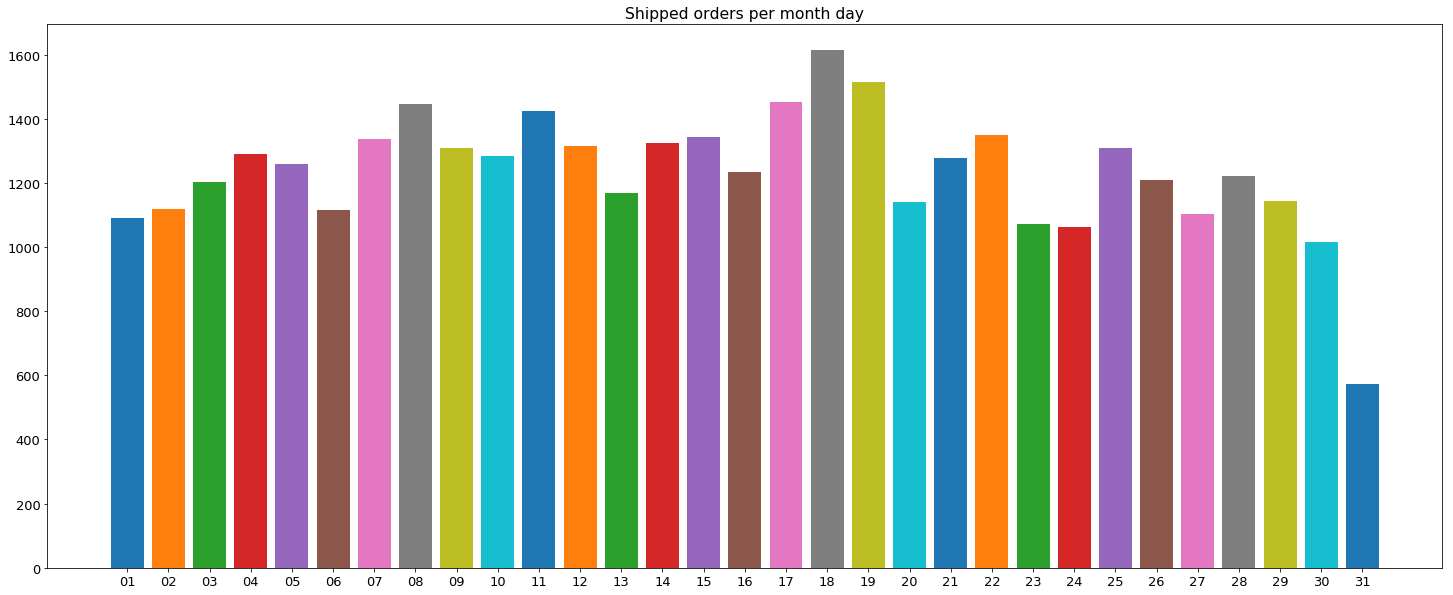

In [9]:
list_order_status = df_orders_day['Day'].unique()
list_os = []

for day in list_order_status:
    #print(day)
    item_tmp = df_orders_day.loc[df_orders_day['Day'] == day]
    list_os.append(item_tmp)

#print(list_os[30])
plt.figure(figsize=(25,10))
cont = 0
for item in list_os:
    #plt.plot(list_os[cont].Day, list_os[cont].Status, color='r', marker ='o')#, label =list_os[cont]['Day'] )#, color='r')
    #plt.bar(x_axis, users, color='r', alpha=0.5, align="center")    
    plt.bar(list_os[cont].Day, list_os[cont].Status)#, label =list_os[cont]['Day'] )#, color='r')
    #plt.legend(list_order_status)#list_os[cont]['Status'])
    #print(list_os[cont]['Status'])   
    cont += 1
#plt.legend('Shipped orders')
plt.title('Shipped orders per month day')
plt.rcParams.update({'font.size': 13})
plt.savefig('Shipped_monthday.jpg')
plt.show()

#    cont +=1

### Getting Items Catalog Dataframe

In [10]:
df_items = data_frame[['Item', 'Description']]
df_items.sort_values(by='Item', ascending = 1)
df_items.drop_duplicates(subset='Item',keep='first', inplace=True)
df_items.dropna(axis=0, how='any', inplace=True)
df_items.head()

C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Item,Description
0,370001MX,minimax? Charger
2,032002MX,SLIM LIFT AIRE BRA 3 pz-M
3,032020MX,SLIM LIFT AIRE BRA CONTEMPORANEO M
4,032025MX,SLIM LIFT AIRE BRA PASTEL MED
5,090009MXB,Cerafit Gold Edition + Salad Chef


### Getting Order - Item Dataframe

In [11]:
df_item_date = data_frame[['Order Date', 'Order ref' , 'Item']]
df_item_date.dropna(axis=0, how='any', inplace=True)
#month = [ x[:7] for x in df_item_date['Order Date'] ]
#df_item_date['Month'] = month
df_item_date.head()

C:\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Order Date,Order ref,Item
0,2017-01-01,MX7072652,370001MX
1,2017-01-01,MX7072654,370001MX
2,2017-01-01,MX7072656,032002MX
3,2017-01-01,MX7072656,032020MX
4,2017-01-01,MX7072656,032025MX


In [12]:
df_item_date.set_index('Item')
df_item_date.head()

,Order Date,Order ref,Item
0,2017-01-01,MX7072652,370001MX
1,2017-01-01,MX7072654,370001MX
2,2017-01-01,MX7072656,032002MX
3,2017-01-01,MX7072656,032020MX
4,2017-01-01,MX7072656,032025MX


### Another thing

In [13]:
data_frame['Status'].unique()

array(['Returned', 'Shipped', 'Cancelled', 'Pending Return',
       'Reship Cancelled', 'Wholesale Closed', 'Wholesale Open',
       'Sent to Batch', nan, 'Imported', 'Payment pending',
       'Ready to Reship', 'Fraud Payment', 'Review Payment Failed',
       'Pending Partial Return', 'Fraud Customer',
       'Review Order Validation', 'Review No Stock', 'Review',
       'Review System Error'], dtype=object)

In [14]:
data_frame['Status'].value_counts()

Shipped                    134883
Returned                    58189
Wholesale Closed            18516
Cancelled                   11743
Reship Cancelled             4660
Payment pending              3958
Sent to Batch                 248
Wholesale Open                243
Review No Stock               142
Ready to Reship               111
Fraud Payment                  87
Pending Return                 65
Fraud Customer                 27
Review                         12
Review Payment Failed           8
Pending Partial Return          6
Review Order Validation         5
Review System Error             4
Imported                        2
Name: Status, dtype: int64

In [15]:
#x_r = [g_ride[x] for x in range(total_r)]
#onth = [ x[:7] for x in df_orders_sum['Order Date'] ]
#f_orders_sum['Month'] = month

In [16]:
#month = [ x[0:7] for x in df_orders_sum['Order Date'] ]
#df_orders_month_status['Month'] = month
df_orders_month = df_orders_sum.groupby('MonthYear', as_index=False)[['Order ref']].count()

In [17]:
df_orders_month.head()

,MonthYear,Order ref
0,2017-01,6060
1,2017-02,4430
2,2017-03,5533
3,2017-04,4734
4,2017-05,2806


### Getting Orders by Status per Month

In [18]:
#month = [ x[0:7] for x in df_orders_sum['Order Date'] ]

#len(month)

#df_orders_month_status['Month'] = month
df_orders_month_status = df_orders_sum.groupby(['MonthYear','Status'], as_index=False).count()
df_orders_month_status = df_orders_month_status[['MonthYear','Status', 'Order Date']]
df_orders_month_status = df_orders_month_status.rename(columns={'Order Date' : 'Nbr of orders'})
df_orders_month_status.head()

,MonthYear,Status,Nbr of orders
0,2017-01,Cancelled,382
1,2017-01,Pending Return,8
2,2017-01,Reship Cancelled,89
3,2017-01,Returned,1799
4,2017-01,Shipped,3782


In [22]:
df_orders_sum['State'] = df_orders_sum['State'].replace(['CIUDAD DE MEXICO', 'CIUDAD DE MÃ\x89XICO', 'CUIDAD DE MEXICO', 'Ciudad de MÃ©xico', 'D.F', 'D.F.', 'DE MEXICO', 'DF', 'DIF', 'DISTRITO', 'DISTRITO FEDERAL', 'DISTRITO FEERAL', 'DISTRITO FERDERAL', 'Distrito Federal'],'CDMX')
df_orders_sum['State'] = df_orders_sum['State'].replace(['MÃ\x89XICO', 'MÃ©xico', 'MEX', 'MEXECO','ESTADO DE MEX', 'EDO DE MEX', 'EDO DE MEXICO', 'EDO MEX', 'EDO. MEXICO', 'EDO.MEX.', 'EDO.MEXICO', 'EDO.NEX.', 'EDOMEX', 'EDOMEX.', 'ESATADO DE MEXICO', 'ESATDO DE MEXICO', 'ESTADO DE MEXICO', 'ESTADO DE MÃ\x89XICO', 'Edomex.'],'MEXICO')
df_orders_sum['State'] = df_orders_sum['State'].replace(['MichoacÃ¡n de Ocampo','MUCHOACAN', 'Mich.', 'MichoacÃ¡n', 'MichoacÃ¡n de Ocampo' 'Mor.','MOR', 'MOR.', 'MORELIA' ,'MIC', 'MICH.', 'MICHIOACAN', 'MICHOACAN', 'MICHOACÃ\x81N DE OCAMPO', 'MICHOCAN'], 'MICHOACAN') 
df_orders_sum['State'] = df_orders_sum['State'].replace(['MONTERREY', 'MONTERREY NUEVO LEON', 'Nuevo LeÃ³n', 'LEON', 'N.L', 'N.L.', 'NLE', 'NUEVO LEON', 'NUEVO LEÃ\x93N', 'NUEVOLEON', 'Nuevo LeÃ³n'], 'NUEVO LEON')
df_orders_sum['State'] = df_orders_sum['State'].replace(['QRO', 'QUE' ,'QUERETARO', 'QUERÃ\x89TARO', 'Qro.', 'QuerÃ©taro','QRO.'], 'QUERETARO')
df_orders_sum['State'] = df_orders_sum['State'].replace(['S.L.P.', 'San Luis PotosÃ\xad', 'SLP', 'SAN LUIS DE LA PAZ', 'SAN LUIS POTOSI', 'SAN LUIS POTOSÃ\x8d'], 'SAN LUIS POTOSI')
df_orders_sum['State'] = df_orders_sum['State'].replace(['MERIDA', 'YUC', 'YUC.', 'YUCATÃ\x81N', 'Yuc.', 'YucatÃ¡n'], 'YUCATAN')

list_state = df_orders_sum['State'].unique() 
list_state.sort()
print(f'{list_state}')

['AGUASCALIENTES' 'BAJACALIFORNIA' 'CAMPECHE' 'CDMX' 'CHIAPAS' 'CHIUAHUA'
 'COAHUILA' 'COLIMA' 'DURANGO' 'GUANAJUATO' 'GUERRERO' 'HIDALGO' 'JALISCO'
 'MEXICO' 'MICHOACAN' 'MORELOS' 'NAYARIT' 'NUEVO LEON' 'OAXACA' 'PUEBLA'
 'QUERETARO' 'QUINTANA ROO' 'SAN LUIS POTOSI' 'SINALOA' 'SONORA' 'TABASCO'
 'TAMAULIPAS' 'TLAXCALA' 'VERACRUZ' 'YUCATAN' 'ZACATECAS']


In [23]:
df_orders_month_status = df_orders_sum.groupby(['Status', 'State'], as_index=False).count()
#df_orders_month_status = df_orders_month_status[['Month','Status', 'Order Date']]
#df_orders_month_status = df_orders_month_status.rename(columns={'Order Date' : 'Nbr of orders'})
df_orders_month_status.head(100)

,Status,State,Order Date,Agent,Order ref,Order Source,Disc Code,Value net,Day,Month,Year,MonthYear
0,Cancelled,AGUASCALIENTES,46,46,46,46,46,46,46,46,46,46
1,Cancelled,BAJACALIFORNIA,112,112,112,112,112,112,112,112,112,112
2,Cancelled,CAMPECHE,19,19,19,19,19,19,19,19,19,19
3,Cancelled,CDMX,516,516,516,516,516,516,516,516,516,516
4,Cancelled,CHIAPAS,59,59,59,59,59,59,59,59,59,59
5,Cancelled,CHIUAHUA,68,68,68,68,68,68,68,68,68,68
6,Cancelled,COAHUILA,69,69,69,69,69,69,69,69,69,69
7,Cancelled,COLIMA,14,14,14,14,14,14,14,14,14,14
8,Cancelled,DURANGO,36,36,36,36,36,36,36,36,36,36
9,Cancelled,GUANAJUATO,108,108,108,108,108,108,108,108,108,108


In [24]:
df_orders_month_status_all = df_orders_sum.groupby(['MonthYear'], as_index=False).count()
df_orders_month_status_all = df_orders_month_status_all[['MonthYear', 'Order Date']]
df_orders_month_status_all = df_orders_month_status_all.rename(columns={'Order Date' : 'Nbr of orders'})
#df_orders_month_status_all 

In [25]:
list_order_status = df_orders_sum['Status'].unique()
list_cb = []
list_os = []

cb_save = widgets.Checkbox(value=False, description='Save Chart?', disabled=False)
display(cb_save)

for status in list_order_status:
    cb_tmp = widgets.Checkbox(value=False, description=status, disabled=False)
    list_cb.append(cb_tmp)
    #display(cb_tmp)
       
i = 0        
cb_l = []
cb_r = []
for cb in list_cb:
    if i == 0:
        cb_l.append(cb)
        i = 1
    else:    
        cb_r.append(cb)
        i = 0
        
left_box = widgets.VBox(cb_l)
right_box = widgets.VBox(cb_r)
widgets.HBox([left_box, right_box])                
    #display(cb, flex_flow='row')
    
#display(list_cb)    
    
#for status in list_order_status:
    #print(status)
 #   item_tmp = df_orders_month_status.loc[df_orders_month_status['Status'] == status]
  #  list_os.append(item_tmp)


Checkbox(value=False, description='Save Chart?')

FloatProgress(value=0.0, description='Creating Chart')

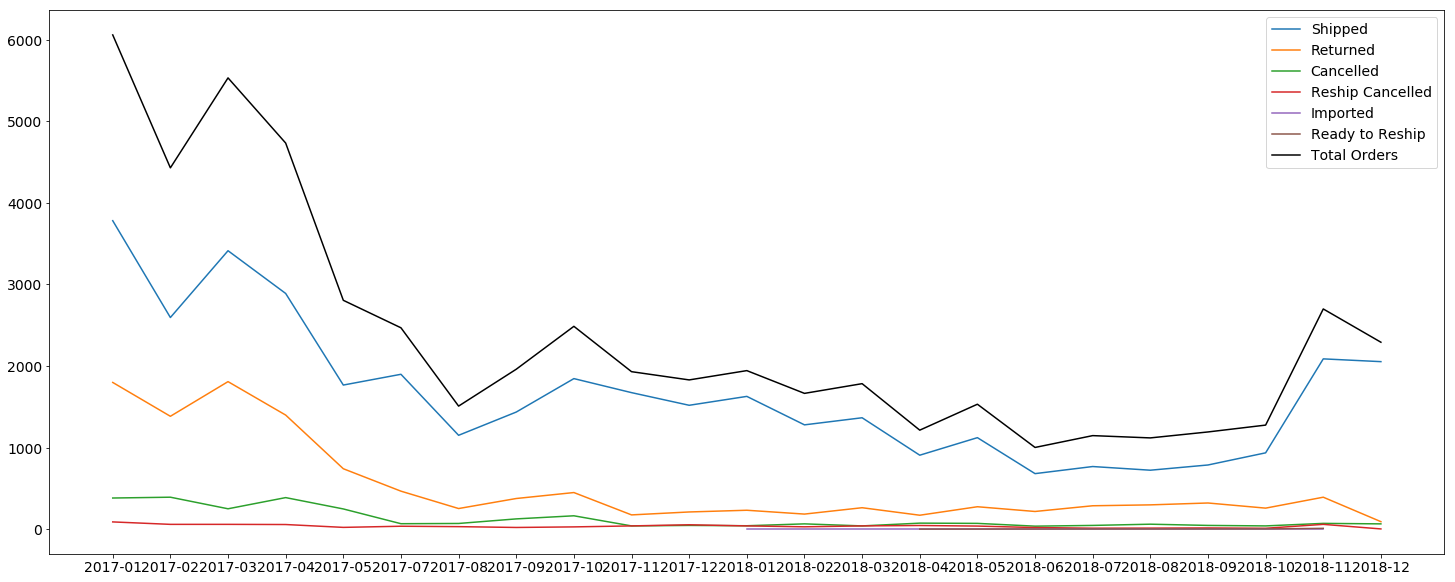

In [40]:
get_chart2(df_orders_sum, list_cb)